In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import tools from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import silhouette_score, classification_report, ConfusionMatrixDisplay

In [3]:
# data load section 
try:
    data = pd.read_csv('data.csv')
    # Clean up column names by removing any leading/trailing spaces
    data.columns = data.columns.str.strip()
    print("File 'data.csv' loaded successfully!")
    print("First 5 rows of your data:")
    print(data.head())
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please make sure the file is in the same directory as your notebook.")

File 'data.csv' loaded successfully!
First 5 rows of your data:
   Accuracy  Avg_Reaction_Time
0      89.0               2.20
1      83.0               1.89
2      90.0               1.28
3      93.0               2.00
4      84.0               1.30


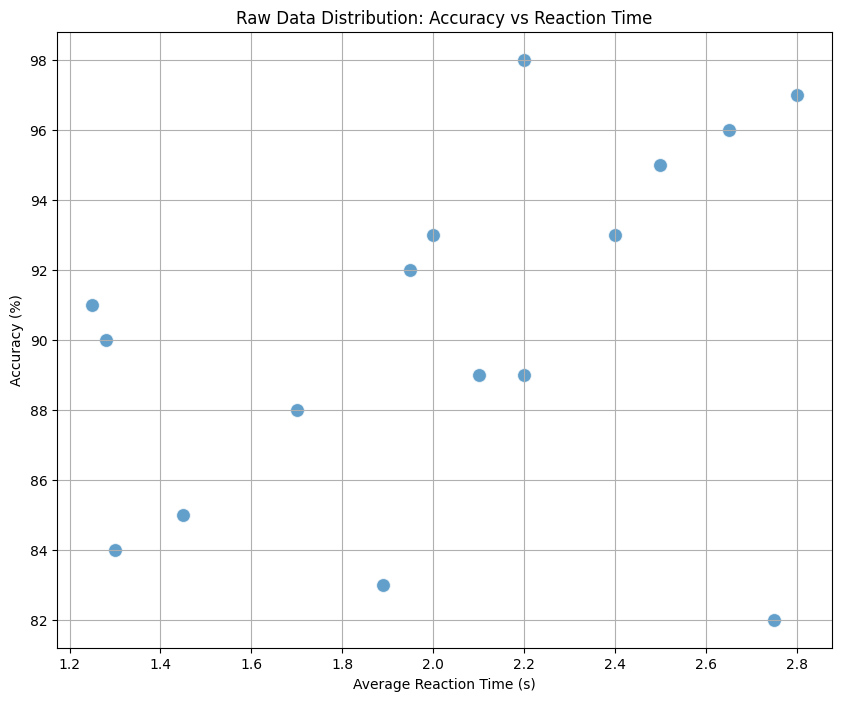

In [4]:
# Generate Data_Visualize.jpg (Raw Data Plot)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=data, 
    x='Avg_Reaction_Time', 
    y='Accuracy',
    alpha=0.7, 
    s=100
)
plt.title('Raw Data Distribution: Accuracy vs Reaction Time')
plt.xlabel('Average Reaction Time (s)')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.savefig('Data_Visualize.jpg', dpi=300) 
plt.show()

In [5]:
# Cell 2: Data Preprocessing (Scaling)

print("Preparing data for clustering...")

# Select the features to be clustered
features = data[['Accuracy', 'Avg_Reaction_Time']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(features)

print("Data has been scaled successfully.")
print("First 5 rows of scaled data:")
print(scaled_features[:5])

Preparing data for clustering...
Data has been scaled successfully.
First 5 rows of scaled data:
[[-0.27095083  0.34357244]
 [-1.50958317 -0.26942011]
 [-0.0645121  -1.47563127]
 [ 0.55480407 -0.05190663]
 [-1.30314445 -1.43608336]]


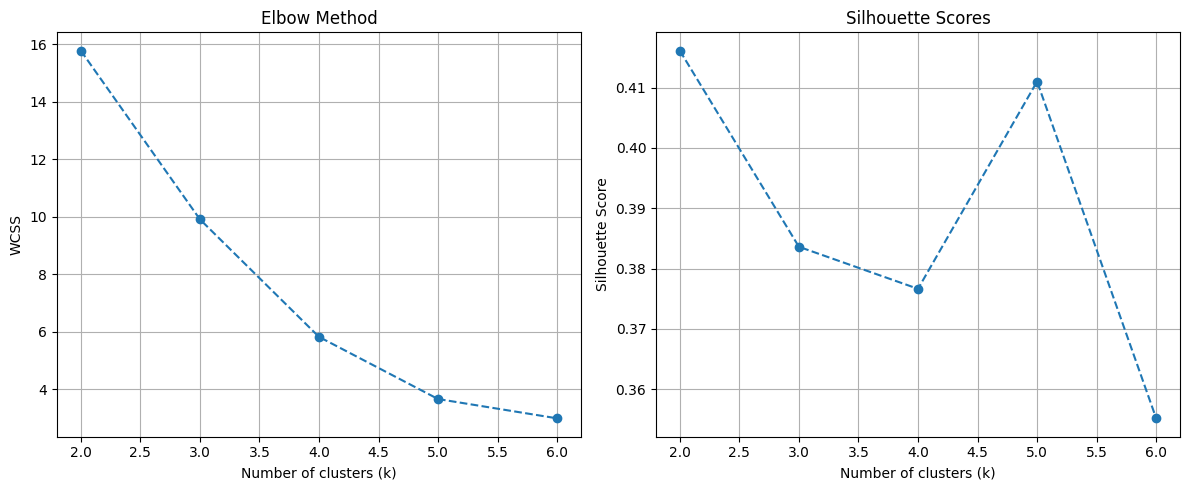

Based on the analysis, the highest Silhouette Score is for k = 2.


In [6]:
# Cell 3: Finding the Optimal Number of Clusters (k)

wcss = [] # Within-Cluster Sum of Squares
silhouette_scores = []
k_range = range(2, 7) # Test k from 2 to 7

for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_model.fit(scaled_features)
    wcss.append(kmeans_model.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans_model.labels_))

# Plot the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)

# Plot the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find the k with the highest silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Based on the analysis, the highest Silhouette Score is for k = {optimal_k}.")

Data with cluster labels:
    Accuracy  Avg_Reaction_Time  cluster
0       89.0               2.20        0
1       83.0               1.89        1
2       90.0               1.28        1
3       93.0               2.00        0
4       84.0               1.30        1
5       95.0               2.50        0
6       93.0               2.40        0
7       96.0               2.65        0
8       85.0               1.45        1
9       92.0               1.95        0
10      91.0               1.25        1
11      97.0               2.80        0
12      88.0               1.70        1
13      89.0               2.10        0
14      82.0               2.75        0
15      98.0               2.20        0


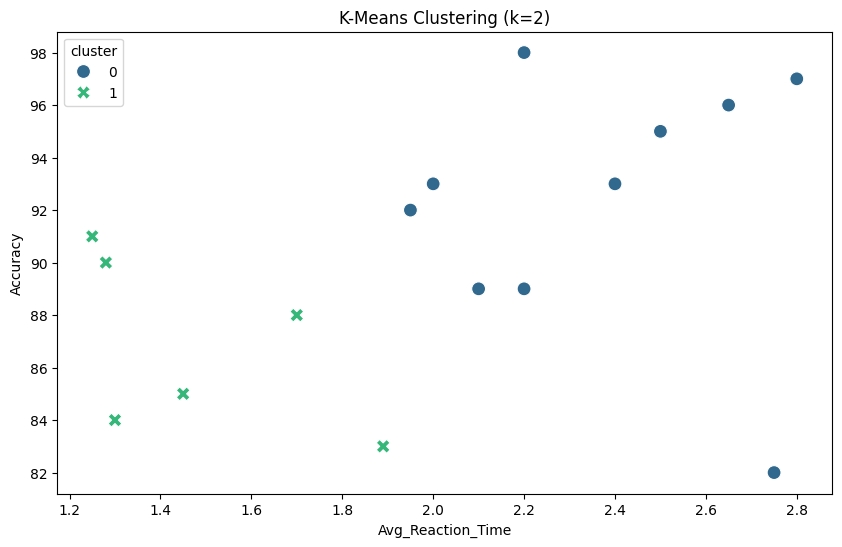

In [7]:
# Cell 4: Apply K-means Clustering and Visualize

# k_to_use = optimal_k 
k_to_use = 2

# Initialize and fit the final KMeans model
kmeans = KMeans(n_clusters=k_to_use, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels back to the original DataFrame
data['cluster'] = cluster_labels
print("Data with cluster labels:")
print(data)


# cluster visualization ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, 
    x='Avg_Reaction_Time', 
    y='Accuracy', 
    hue='cluster', 
    palette='viridis',
    s=100,
    style='cluster',  # Adds markers per cluster
    legend='full'
)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.savefig('K_means_clustering.jpg', dpi=300)
plt.show()

In [8]:
# Cell 5: Preparing Data for SVM and Decision Tree

print("Preparing data for supervised classification...")

# X contains the features the model will learn from
X = data[['Accuracy', 'Avg_Reaction_Time']]

# y contains the target "answers" (our cluster labels)
y = data['cluster']

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")

Preparing data for supervised classification...
Data split into 12 training samples and 4 testing samples.


--- Training and Evaluating SVM Classifier ---

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4


SVM Confusion Matrix:


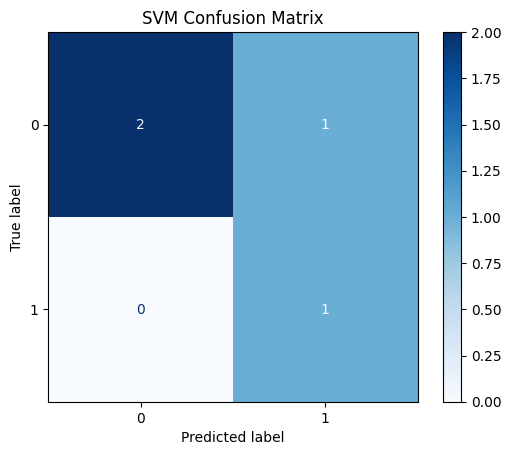

In [9]:
# Cell 6: Applying SVM and Showing Confusion Matrix

print("--- Training and Evaluating SVM Classifier ---")
# Initialize the SVM model
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# function call for predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Print the classification report
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0))

# Display the Confusion Matrix
print("\nSVM Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix')
plt.savefig('SVM_Confusion_Matrix.jpg', dpi=300)
plt.show()

--- Training and Evaluating Decision Tree Classifier ---

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4


Decision Tree Confusion Matrix:


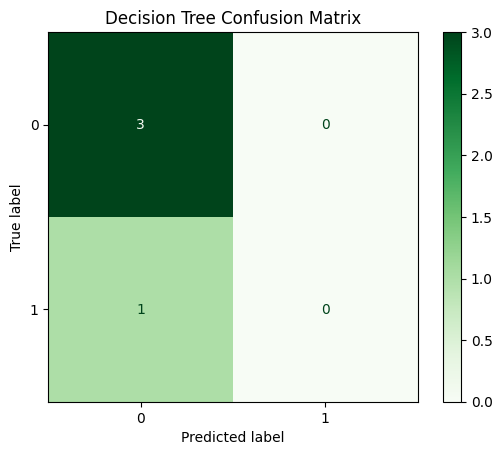

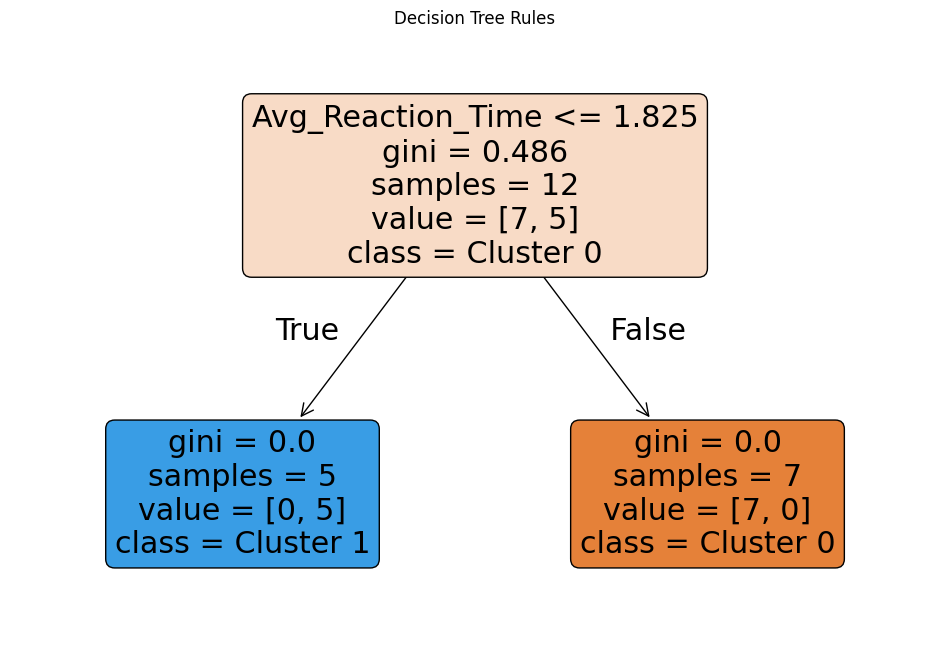

In [10]:
# Cell 7: Applying Decision Tree and Show Results

print("--- Training and Evaluating Decision Tree Classifier ---")
# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Print the classification report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

# Display the Confusion Matrix
print("\nDecision Tree Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test, cmap=plt.cm.Greens)
plt.title('Decision Tree Confusion Matrix')
plt.savefig('Decision_Tree confusion', dpi=300)
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=[f"Cluster {i}" for i in dt_classifier.classes_], 
          filled=True, rounded=True)
plt.title('Decision Tree Rules')

plt.savefig('Decision_Tree.jpg', dpi=300)
plt.show()